In [830]:
import warnings
warnings.filterwarnings("ignore")

## 1. Data UnderStanding and Explorarion

In [831]:
# import libraries
import pandas as pd
import numpy as np

In [832]:
# reading the data
dataset = pd.read_csv('bike_sharing_data.csv')

In [833]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [834]:
dataset.shape

(730, 16)

In [835]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [836]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [837]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [838]:
# assigning string values to numerical data for seasons
# 1 - spring, 2 - summer, 3 - fall, 4 - winter
dataset['season'] = dataset.season.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
dataset.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [839]:
dataset['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [840]:
# 0 - 2018, 1 - 2019
dataset['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [841]:
# assigning string values to numerical data for months
def to_month(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [842]:
dataset['mnth'] = to_month(dataset.mnth)

In [843]:
dataset['mnth'].astype('category').value_counts()

mnth
Aug    62
Dec    62
Jan    62
Jul    62
Mar    62
May    62
Oct    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: count, dtype: int64

In [844]:
dataset['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [845]:
def to_week_day(x):
    return x.map({1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat', 0: 'Sun'})

In [846]:
dataset['weekday'] = to_week_day(dataset.weekday)

In [847]:
dataset['weekday'].astype('category').value_counts()

weekday
Mon      105
Sat      105
Sun      105
Fri      104
Thurs    104
Tues     104
Wed      103
Name: count, dtype: int64

In [848]:
dataset['workingday'].astype('category').value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [849]:
# 1 - clear, fewCloud, partyCloud
# 2 - mist, cloudy, 
# 3 - lightSnow, lightRainThunderstorm, 
# assigning string values to numerical data for weathersit
dataset['weathersit'] = dataset.weathersit.map({1: 'A', 2: 'B', 3: 'C'})
dataset['weathersit'].astype('category').value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

## 2. Data Visuilisation

In [850]:
# imorting libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

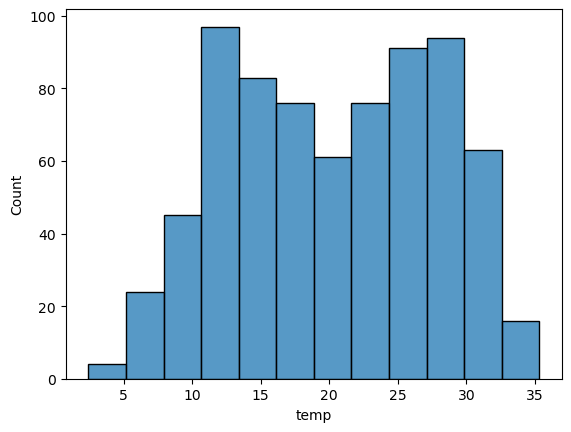

In [851]:
# temperature
sns.histplot(dataset['temp'])
plt.show()

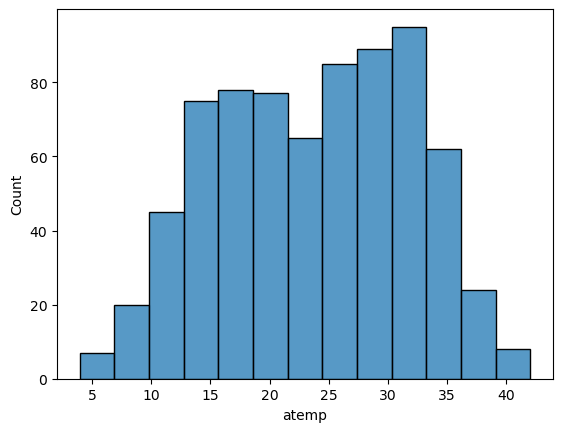

In [852]:
# actual temperature
sns.histplot(dataset['atemp'])
plt.show()

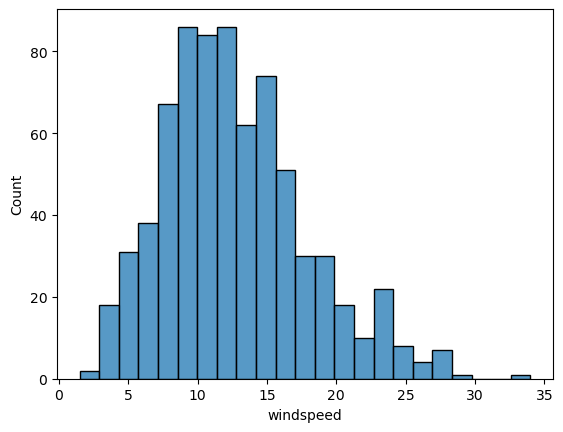

In [853]:
# windspeed
sns.histplot(dataset['windspeed'])
plt.show()

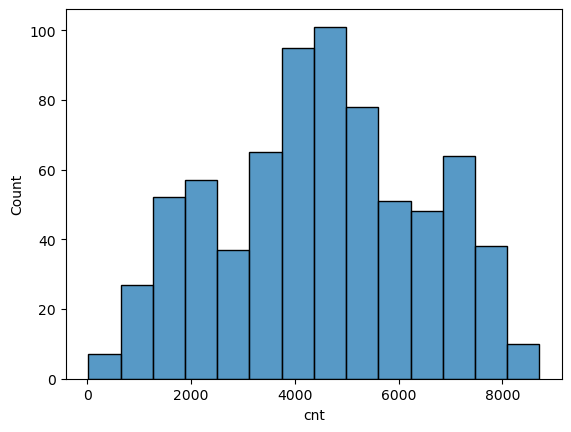

In [854]:
# target variable - count of total rental bikes including both casual and registered
sns.histplot(dataset['cnt'])
plt.show()

In [855]:
# converting date to datetime format
dataset['dteday'] = dataset['dteday'].astype('datetime64[ns]')

In [856]:
dataset['dteday'].head()

0   2018-01-01
1   2018-02-01
2   2018-03-01
3   2018-04-01
4   2018-05-01
Name: dteday, dtype: datetime64[ns]

In [857]:
dataset_categorical = dataset.select_dtypes(exclude=['float64', 'datetime64','int64'])

In [858]:
dataset_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [859]:
dataset_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tues,A
4,spring,Jan,Wed,A
...,...,...,...,...
725,spring,Dec,Thurs,B
726,spring,Dec,Fri,B
727,spring,Dec,Sat,B
728,spring,Dec,Sun,A


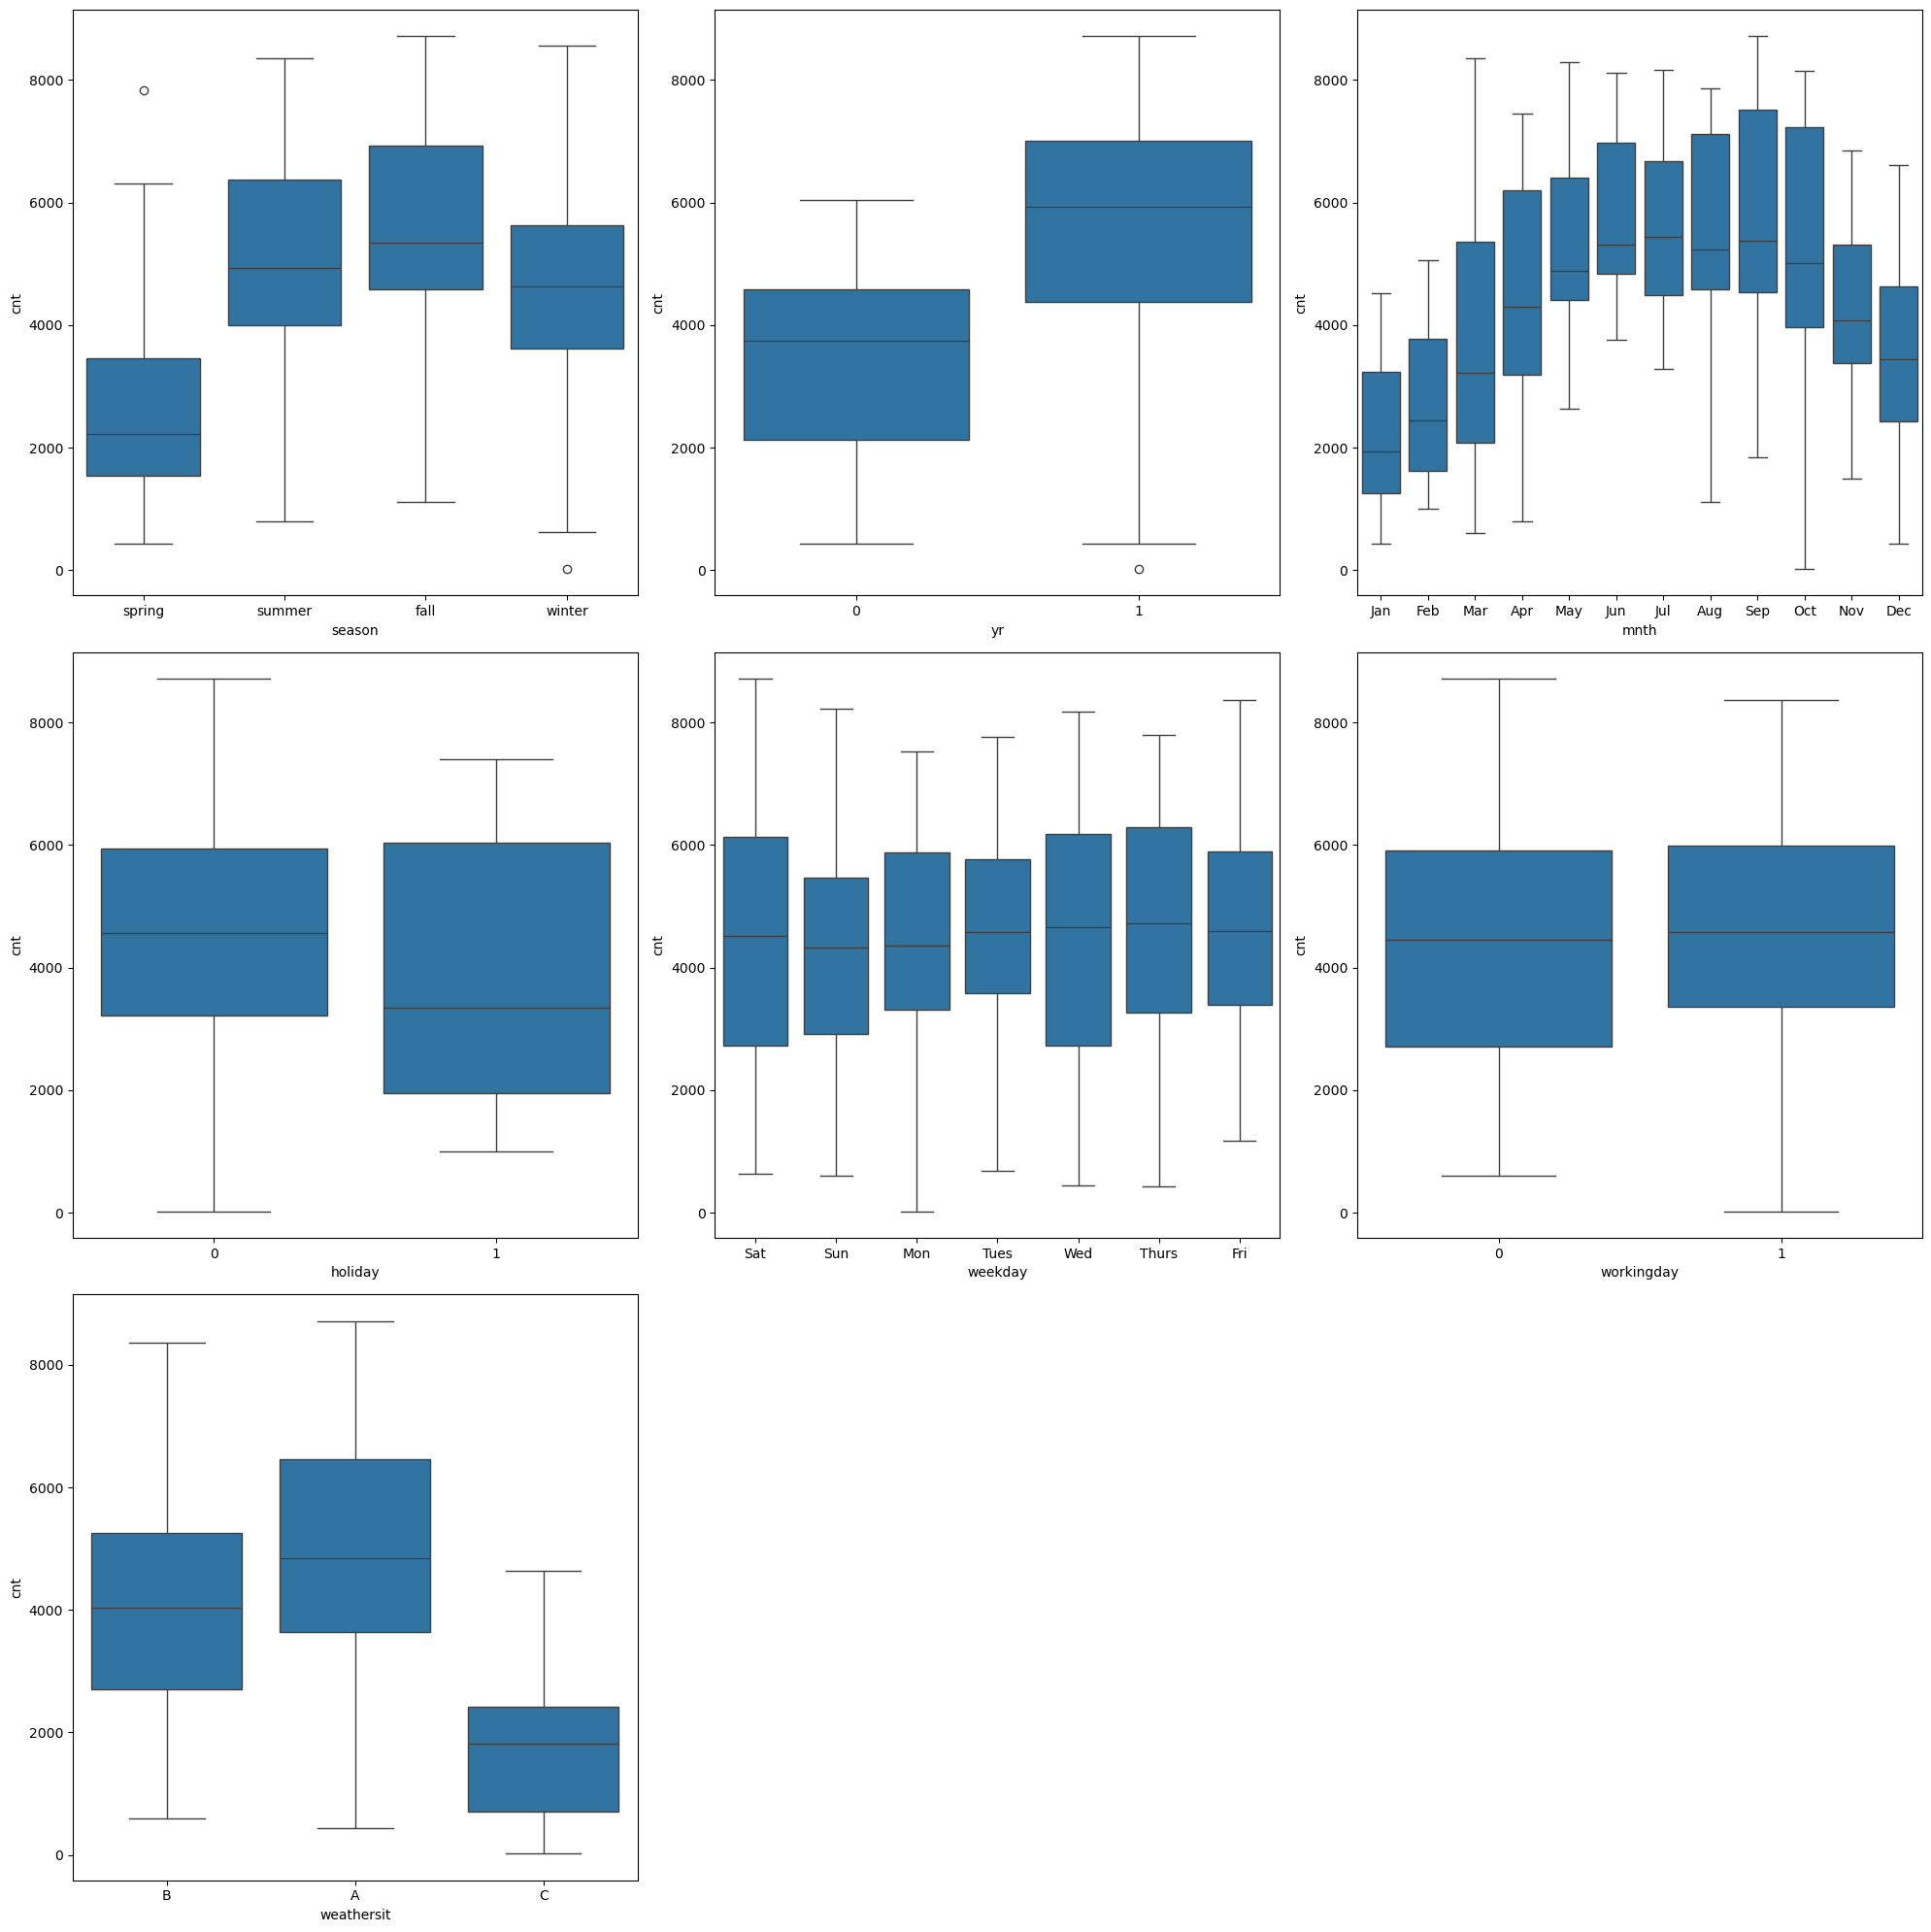

In [860]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = dataset)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = dataset)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = dataset)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = dataset)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = dataset)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = dataset)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dataset)
plt.tight_layout()
plt.show()


In [861]:
intvarlist = ["casual", "registered", "cnt"]
for var in intvarlist:
    dataset[var] = dataset[var].astype('float64')

In [862]:
dataset_numeric = dataset.select_dtypes(include=['float64'])

In [863]:
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


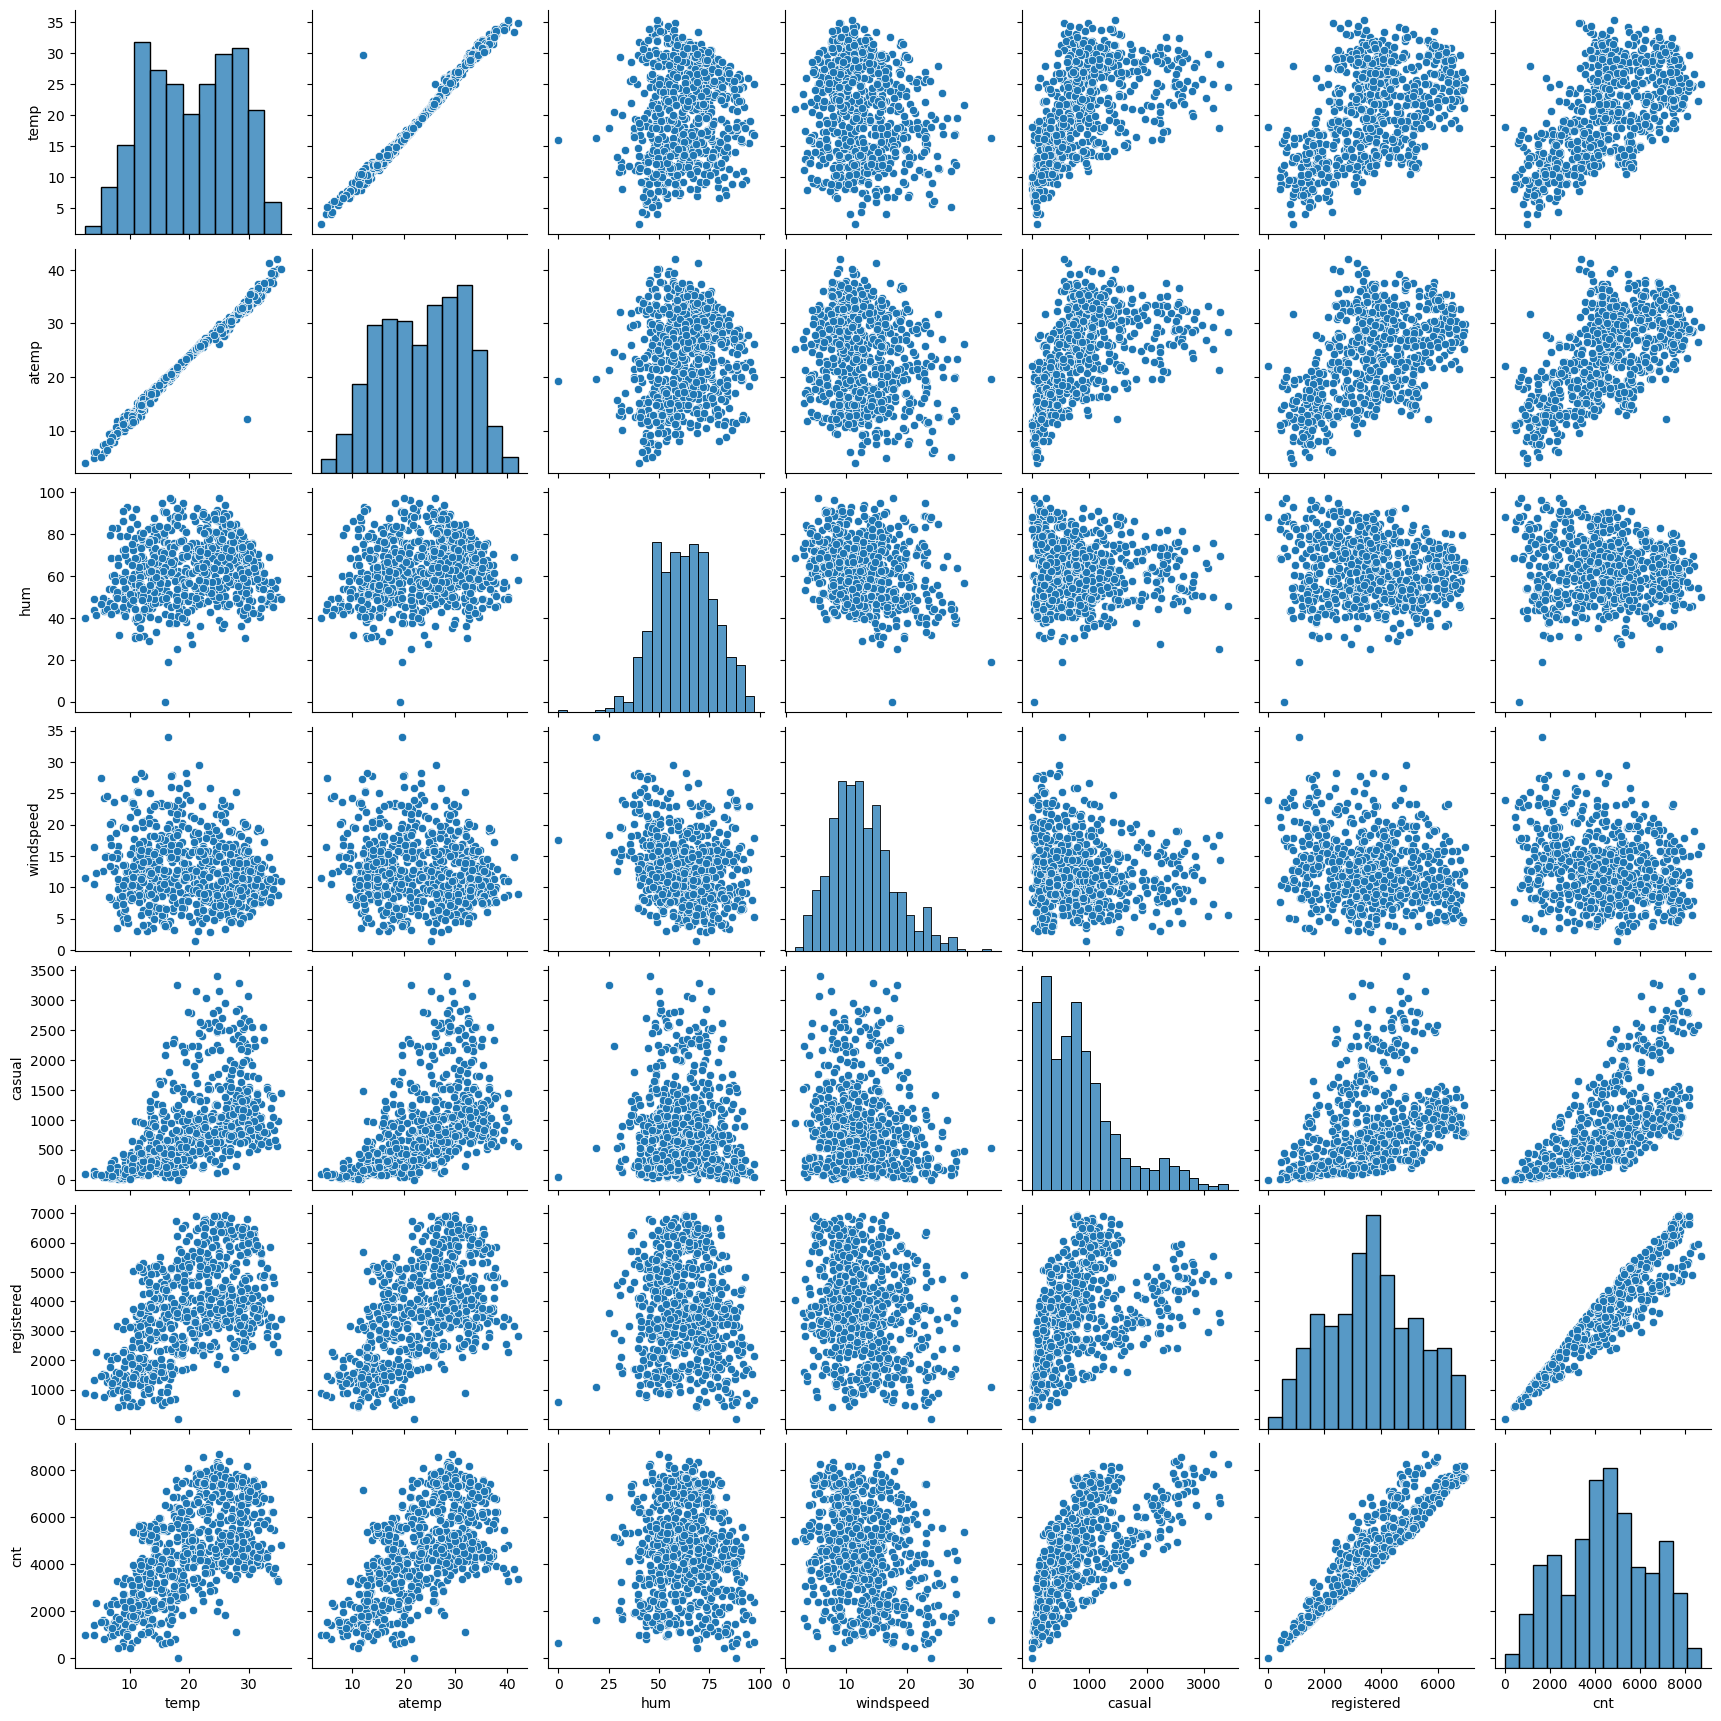

In [864]:
sns.pairplot(dataset_numeric)
plt.show()

In [865]:
cor = dataset_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


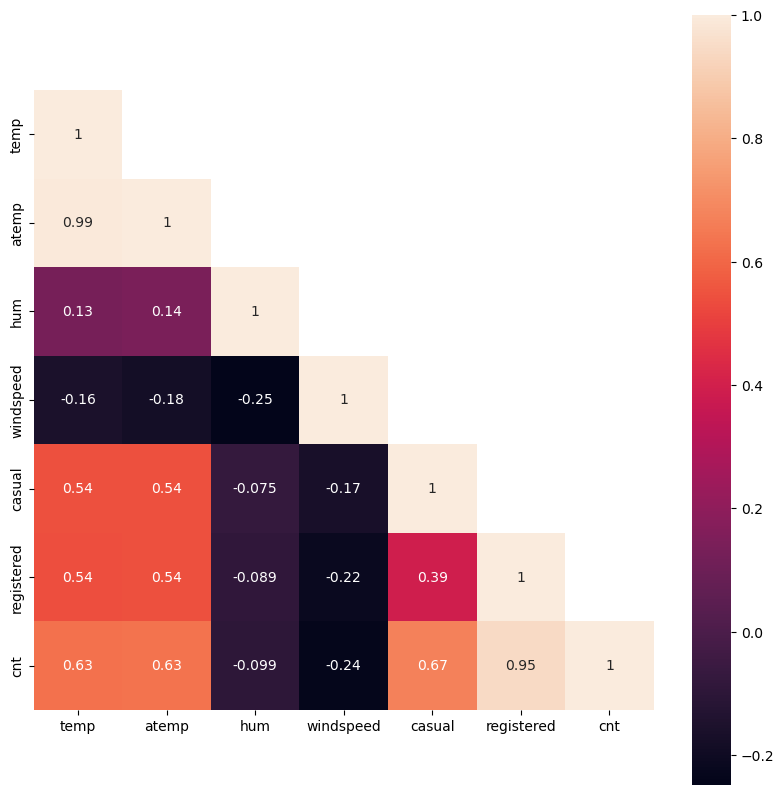

In [866]:
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(cor, mask=mask, annot=True ,vmax=1, square=True)
plt.show()

In [867]:
# dropping atemp as it is highly correlated with temp
dataset.drop(['atemp'], axis = 1 ,inplace=True)

In [868]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,Jan,0,Sun,0,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,Jan,0,Mon,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,Jan,0,Tues,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,Jan,0,Wed,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


## 3. Data Prepration

In [869]:
dataset_categorical = dataset.select_dtypes(include=['object'])

In [870]:
dataset_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tues,A
4,spring,Jan,Wed,A


In [871]:
dataset_dummy = pd.get_dummies(dataset_categorical, drop_first=True).astype(int)
dataset_dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [872]:
# drop categorical variables
dataset = dataset.drop(list(dataset_categorical.columns), axis = 1)
dataset

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [873]:
# append dummy variables
dataset = pd.concat([dataset, dataset_dummy], axis = 1)
dataset.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,0,1,0,0,0,0,1,0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,1,0,0,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,1,0,0,0,0,0,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,0,1,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,1,0,0


In [874]:
dataset = dataset.drop(['instant', 'dteday'], axis = 1, inplace=False)
dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,1,0,0


## 4. Model Building and Eval

In [875]:
# import libs
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE

In [876]:
# spilitting the data
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 100)


In [877]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,1,0,0,0,0,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,0,1,0,0,0,0,1,0


In [878]:
scaler = MinMaxScaler()

In [879]:
# apply scaler() to all the columns except the 'dummy' variables
var = ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
df_train[var] = scaler.fit_transform(df_train[var])

In [880]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

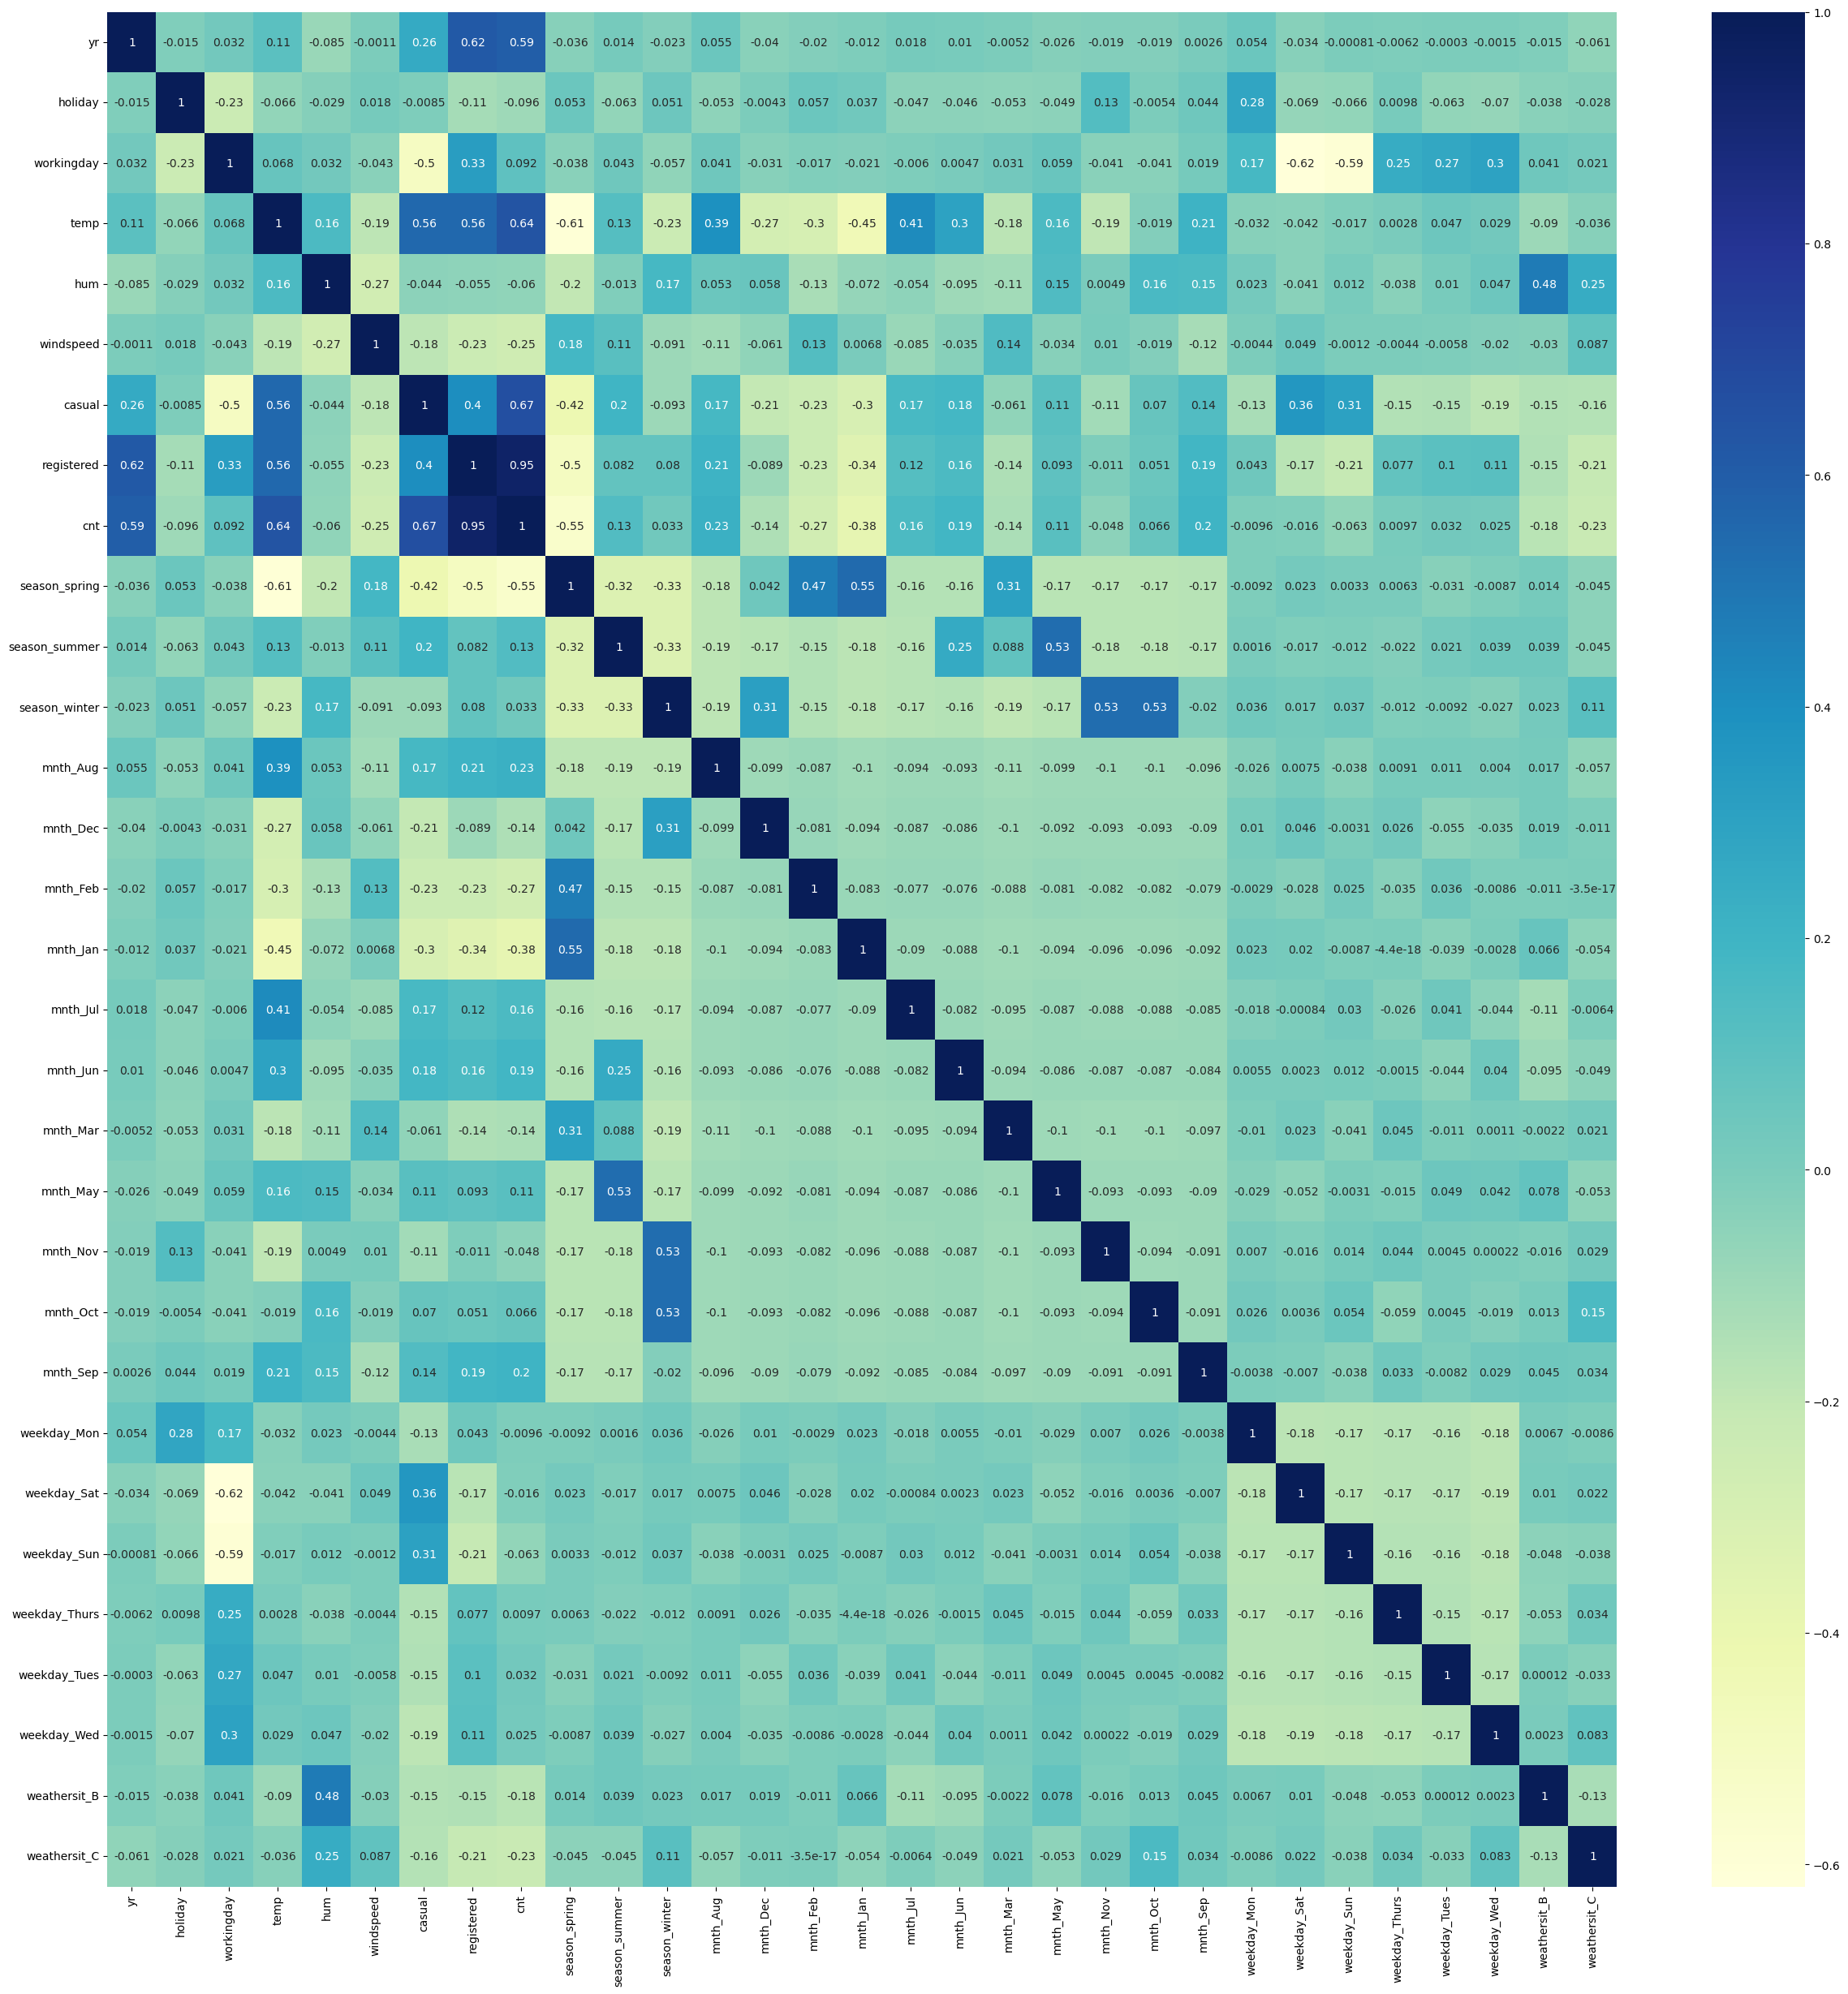

In [881]:
# checking the correlation between variables after scaling
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")

In [882]:
# diving into x and y
x_train = df_train.drop(['casual','registered','cnt'], axis = 1)
y_train = df_train['cnt']

In [883]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [884]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [885]:
np.array(x_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [886]:
x_train_lm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_lm).fit()

In [887]:
lr.params

const            0.245085
yr               0.232116
holiday          0.009959
workingday       0.096884
temp             0.450562
hum             -0.151340
windspeed       -0.186453
season_spring   -0.048159
season_summer    0.038725
season_winter    0.105847
mnth_Aug         0.014404
mnth_Dec        -0.045586
mnth_Feb        -0.032282
mnth_Jan        -0.062777
mnth_Jul        -0.040350
mnth_Jun        -0.002972
mnth_Mar         0.001045
mnth_May         0.023940
mnth_Nov        -0.041851
mnth_Oct         0.007534
mnth_Sep         0.081060
weekday_Mon     -0.020907
weekday_Sat      0.096389
weekday_Sun      0.041853
weekday_Thurs   -0.009237
weekday_Tues    -0.018890
weekday_Wed     -0.005388
weathersit_B    -0.061066
weathersit_C    -0.257443
dtype: float64

In [888]:
lm = LinearRegression()
lm.fit(x_train_lm, y_train)

LinearRegression()

In [889]:
print(lm.coef_)
print(lm.intercept_)

[-8.49791478e+08  2.32540791e-01 -1.28124439e+12 -1.28124439e+12
  4.49947693e-01 -1.50563261e-01 -1.85492132e-01 -4.56489872e-02
  4.03680467e-02  1.03936291e-01  1.69709649e-02 -4.20385389e-02
 -3.27640793e-02 -6.38554980e-02 -3.87217329e-02 -2.32365691e-03
  4.41171981e-04  2.43581366e-02 -3.78015058e-02  1.08949312e-02
  8.28723526e-02 -2.12678369e-02 -1.28124439e+12 -1.28124439e+12
 -9.71820371e-03 -1.89202723e-02 -5.75780453e-03 -6.14178255e-02
 -2.57599356e-01]
1282094185831.8884


In [890]:
lr.summary()
lr.rsquared

0.8533032523096307

In [891]:
rfe1 = RFE(estimator=lm, n_features_to_select=15)

rfe1.fit(x_train, y_train)

print(rfe1.support_)
print(rfe1.ranking_)

[ True  True  True  True  True  True  True  True  True False False False
 False  True False False False False False  True False  True  True False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  7  4  5  2  1 13 14  6  3 10  1  8  1  1 11
  9 12  1  1]


In [892]:
col1 = x_train.columns[rfe1.support_]

In [893]:
col1

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Sat', 'weekday_Sun', 'weathersit_B',
       'weathersit_C'],
      dtype='object')

In [894]:
x_train_rfe = x_train[col1]
x_train_rfe1 = sm.add_constant(x_train_rfe)
lm1 = sm.OLS(y_train, x_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          1.13e-191
Time:                        18:49:30   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1989      0.028      7.181      0.000       0.144       0.253
yr                0.2297      0.008     28.660      0.000       0.214       0.245
holiday          -0.0190      0.021     -0.892      0.373      -0.061       0.023
workingday        0.0837      0.010      8.672      0.000       0.065       0.103
temp              0.5278      0.033     15.897      0.000       0.463       0.593
hum              -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed        -0.1806      0.025     -7.110      0.000      -0.231      -0.131
season_spring    -0.0554      0.021     -2.694      0.007      -0.096      -0.015
season_summer     0.0526      0.015      3.553      0.000       0.024       0.082
season_winter     0.1003      0.017      5.890      0.000       0.067       0.134
mnth_Jul         -0.0549      0.018     -3.035      0.003      -0.090      -0.019
mnth_Sep          0.0818      0.016      4.956      0.000       0.049       0.114
weekday_Sat       0.0937      0.012      8.045      0.000       0.071       0.117
weekday_Sun       0.0405      0.012      3.304      0.001       0.016       0.065
weathersit_B     -0.0578      0.010     -5.559      0.000      -0.078      -0.037
weathersit_C     -0.2463      0.026     -9.449      0.000      -0.298      -0.195
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                     1.39e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.79e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [895]:
lm1.rsquared

0.8473834224036465

In [896]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [897]:
a = x_train_rfe1.drop(['const'], axis = 1)

In [898]:
# evaluting VIF
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.69
11,weekday_Sat,12.20
12,weekday_Sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.61
4,hum,1.91
13,weathersit_B,1.57


In [899]:
rfe2 = RFE(estimator=lm, n_features_to_select=7)

rfe2.fit(x_train, y_train)

print(rfe2.support_)
print(rfe2.ranking_)

[ True  True  True  True False False False False False False False False
 False False False False False False False False False  True  True False
 False False False  True]
[ 1  1  1  1  3  2  4  9  8 15 12 13 10  5 21 22 14 11 18  7 16  1  1 19
 17 20  6  1]


In [900]:
col2 = x_train.columns[rfe2.support_]
col2

Index(['yr', 'holiday', 'workingday', 'temp', 'weekday_Sat', 'weekday_Sun',
       'weathersit_C'],
      dtype='object')

In [901]:
x_train_rfe2 = x_train[col2]
x_train_rfe2 = sm.add_constant(x_train_rfe2)
lr2 = sm.OLS(y_train, x_train_rfe2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     224.0
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          1.41e-138
Time:                        18:49:30   Log-Likelihood:                 370.22
No. Observations:                 510   AIC:                            -726.4
Df Residuals:                     503   BIC:                            -696.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0578      0.013      4.579      0.000       0.033       0.083
yr               0.2326      0.011     22.100      0.000       0.212       0.253
holiday         -0.0400      0.026     -1.509      0.132      -0.092       0.012
workingday       0.0426      0.010      4.360      0.000       0.023       0.062
temp             0.5740      0.023     24.565      0.000       0.528       0.620
weekday_Sat      0.0518      0.013      3.951      0.000       0.026       0.078
weekday_Sun      0.0034      0.013      0.252      0.801      -0.023       0.030
weathersit_C    -0.2371      0.031     -7.646      0.000      -0.298      -0.176
==============================================================================
Omnibus:                       11.140   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.480
Skew:                          -0.320   Prob(JB):                      0.00321
Kurtosis:                       3.362   Cond. No.                     1.17e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.91e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [902]:
lr2.rsquared

0.7276877729150353

In [903]:
b = x_train_rfe2.drop(['const'], axis = 1)

In [904]:
# evaluting VIF
vif1 = pd.DataFrame()
vif1['Features'] = b.columns
vif1['VIF'] = [variance_inflation_factor(a.values, i) for i in range(b.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,Features,VIF
2,workingday,50.69
6,weathersit_C,5.02
3,temp,3.62
1,holiday,2.91
4,weekday_Sat,1.91
5,weekday_Sun,1.20
0,yr,1.03


In [905]:
y_train_cnt = lr2.predict(x_train_rfe2)

<Axes: ylabel='Count'>

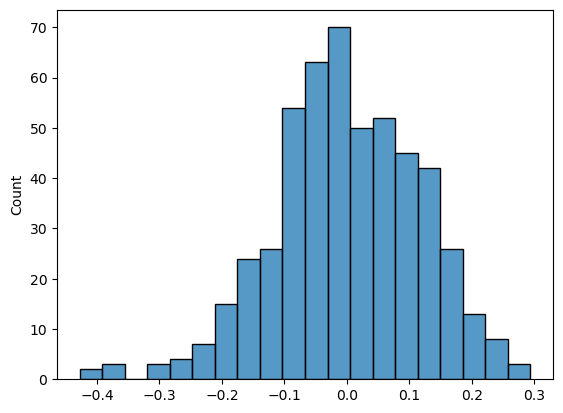

In [906]:
plt.figure()
sns.histplot((y_train - y_train_cnt), bins = 20)


In [907]:
df_test[var] = scaler.transform(df_test[var])

In [908]:
y_test = df_test['cnt']
x_test = df_test.drop(['casual','registered','cnt'], axis = 1)

In [909]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [912]:
c = x_train_rfe2.drop(['const'], axis = 1)
col3 =  c.columns

In [913]:
x_test_rfe2 = x_test[col3]
x_test_rfe2 = sm.add_constant(x_test_rfe2)
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   workingday    219 non-null    int64  
 4   temp          219 non-null    float64
 5   weekday_Sat   219 non-null    int64  
 6   weekday_Sun   219 non-null    int64  
 7   weathersit_C  219 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 15.4 KB


In [914]:
y_pred = lr2.predict(x_test_rfe2)

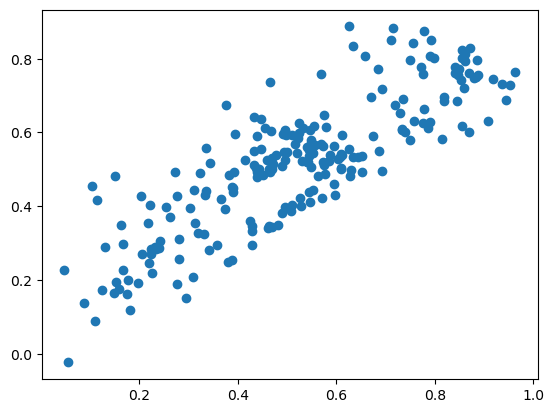

In [915]:
plt.figure()
plt.scatter(y_test, y_pred)

In [916]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6983957256155084

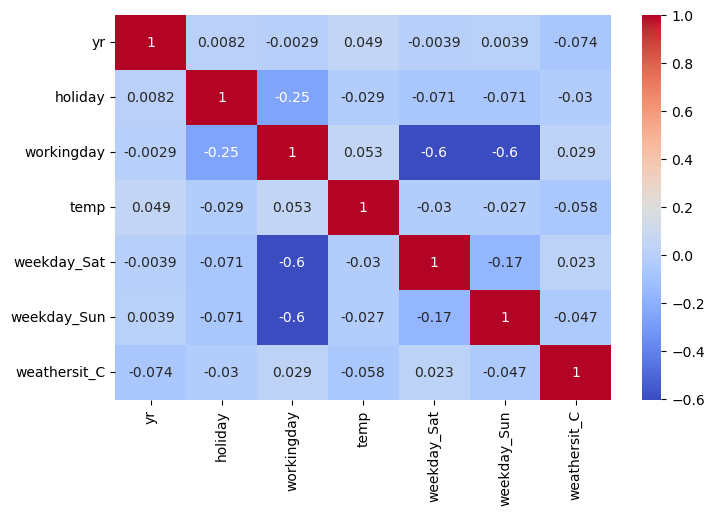

In [919]:
plt.figure(figsize=(8,5))
sns.heatmap(dataset[col2].corr(),cmap='coolwarm',annot=True)
plt.show() 